In [17]:
import fcsparser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [11]:
data0, meta0 = fcsparser.parse("FC-based-SCP/Bone marrow/SCP43132/D0.fcs")
data2,meta2 = fcsparser.parse("FC-based-SCP/Bone marrow/SCP43132/D2.fcs")

In [15]:
meta0

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD43,7-AAD,CD34,APC-Alexa 700-A,CD90,CD45RA,CD31,CD49f,CD73,CD45,FLK1,CD38,Time
0,130600.125000,90929.0,94128.507812,79235.515625,60819.0,85380.867188,56.159996,21.470758,-9.150822,31.490097,32474.951172,60.540997,-261.430664,6551.897461,159.545639,-80.263954,256.939453,-63.249859,169.300003
1,80957.398438,50072.0,105959.906250,153183.421875,90126.0,111388.820312,96.719994,283.025726,53.760460,-455.719971,29745.371094,217.189240,-259.038391,4625.441406,480.594391,-697.474426,340.916870,182.009308,169.399994
2,86921.000000,59944.0,95029.609375,77050.734375,64142.0,78725.289062,48.359997,-41.817535,80.059639,-107.607040,11703.117188,110.565376,-118.422867,3148.934570,-2.337443,-238.216705,185.449692,-12.735330,188.199997
3,83079.679688,55175.0,98680.742188,101953.796875,76017.0,87896.710938,70.199997,92.987617,40.151985,-531.237305,14608.726562,18.896696,-150.888412,3893.457520,547.457886,-1778.021118,186.050293,30.157907,190.100006
4,98506.843750,58232.0,110862.492188,139708.921875,97454.0,93951.648438,77.219994,221.149643,36.541595,-400.574341,70965.757812,-169.171326,-151.845291,5848.915039,338.565826,-198.877045,640.476135,182.704330,191.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,126516.718750,76945.0,107757.484375,150018.953125,110503.0,88971.718750,68.639999,2.892729,66.244530,-105.767982,7427.558594,166.327606,-49.982922,1295.965210,105.585907,-48.053234,83.305931,49.950005,44657.199219
3728,107032.000000,60828.0,115316.125000,158610.656250,107706.0,96510.023438,93.599998,-31.453959,57.789314,-91.018127,6432.997070,137.118103,-21.319254,1017.148804,166.172333,-340.170166,46.474270,56.232998,44742.300781
3729,66205.484375,39025.0,111181.109375,124935.718750,90727.0,90246.421875,141.179993,27.909964,63.365166,-99.505928,7225.313965,148.220963,-199.621384,3974.544434,181.151947,-476.580933,609.671021,19.336592,44742.601562
3730,101723.921875,55613.0,119874.476562,135542.937500,93051.0,95463.156250,73.320000,195.064148,81.796387,0.501853,11332.818359,79.231239,-215.908173,6267.276855,1.741724,593.648254,311.131042,-21.868925,44746.000000


C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess

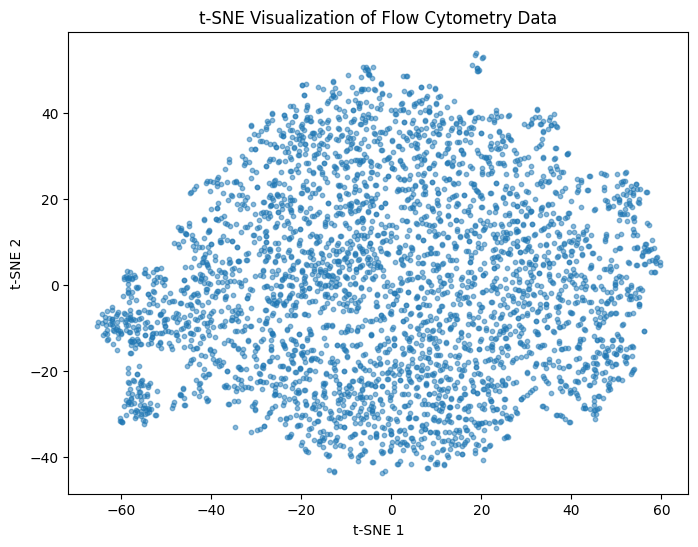

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(meta0)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Visualization of Flow Cytometry Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [25]:
# 排除形态异常的细胞（细胞碎片 双重细胞或者聚集体）
meta0 = meta0[meta0['FSC-A']>1000]
meta0 = meta0[meta0['FSC-H']/meta0['FSC-W']<1.1]
meta0 = meta0[meta0['SSC-A']>500]
# 排除死细胞
meta0 = meta0[meta0['7-AAD']<500]
meta0

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD43,7-AAD,CD34,APC-Alexa 700-A,CD90,CD45RA,CD31,CD49f,CD73,CD45,FLK1,CD38,Time
0,130600.125000,90929.0,94128.507812,79235.515625,60819.0,85380.867188,56.159996,21.470758,-9.150822,31.490097,32474.951172,60.540997,-261.430664,6551.897461,159.545639,-80.263954,256.939453,-63.249859,169.300003
1,80957.398438,50072.0,105959.906250,153183.421875,90126.0,111388.820312,96.719994,283.025726,53.760460,-455.719971,29745.371094,217.189240,-259.038391,4625.441406,480.594391,-697.474426,340.916870,182.009308,169.399994
2,86921.000000,59944.0,95029.609375,77050.734375,64142.0,78725.289062,48.359997,-41.817535,80.059639,-107.607040,11703.117188,110.565376,-118.422867,3148.934570,-2.337443,-238.216705,185.449692,-12.735330,188.199997
3,83079.679688,55175.0,98680.742188,101953.796875,76017.0,87896.710938,70.199997,92.987617,40.151985,-531.237305,14608.726562,18.896696,-150.888412,3893.457520,547.457886,-1778.021118,186.050293,30.157907,190.100006
4,98506.843750,58232.0,110862.492188,139708.921875,97454.0,93951.648438,77.219994,221.149643,36.541595,-400.574341,70965.757812,-169.171326,-151.845291,5848.915039,338.565826,-198.877045,640.476135,182.704330,191.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,126516.718750,76945.0,107757.484375,150018.953125,110503.0,88971.718750,68.639999,2.892729,66.244530,-105.767982,7427.558594,166.327606,-49.982922,1295.965210,105.585907,-48.053234,83.305931,49.950005,44657.199219
3728,107032.000000,60828.0,115316.125000,158610.656250,107706.0,96510.023438,93.599998,-31.453959,57.789314,-91.018127,6432.997070,137.118103,-21.319254,1017.148804,166.172333,-340.170166,46.474270,56.232998,44742.300781
3729,66205.484375,39025.0,111181.109375,124935.718750,90727.0,90246.421875,141.179993,27.909964,63.365166,-99.505928,7225.313965,148.220963,-199.621384,3974.544434,181.151947,-476.580933,609.671021,19.336592,44742.601562
3730,101723.921875,55613.0,119874.476562,135542.937500,93051.0,95463.156250,73.320000,195.064148,81.796387,0.501853,11332.818359,79.231239,-215.908173,6267.276855,1.741724,593.648254,311.131042,-21.868925,44746.000000


In [13]:
meta2

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,CD43,7-AAD,CD34,APC-Alexa 700-A,CD90,CD45RA,CD31,CD49f,CD73,CD45,FLK1,CD38,Time
0,95094.601562,70793.0,88033.000000,49707.839844,42923.0,75895.281250,63.959999,7.018570,28.981997,-551.426880,45456.222656,-53.075813,2.144006,2440.051270,569.526611,-121.118599,105.362892,20.120943,159.800003
1,92014.882812,60264.0,100064.507812,42059.937500,34494.0,79910.710938,-2.340000,-38.756535,-5.357100,-426.643890,30390.658203,-22.739727,-50.099480,2855.087646,344.415161,183.221786,75.967537,98.569336,168.500000
2,127332.039062,80113.0,104163.281250,54925.257812,40643.0,88565.843750,49.139999,-16.509066,-33.938610,-1601.759033,53615.683594,-53.963566,-51.198532,4223.144043,1897.849243,682.538391,273.141266,29.596548,174.899994
3,113730.000000,70744.0,105357.476562,67828.796875,51614.0,86124.476562,75.659996,0.049560,72.287987,-445.815186,28783.755859,88.060257,60.248241,1414.380127,342.262299,-747.237000,208.443298,52.563469,178.899994
4,110639.398438,80914.0,89611.992188,113617.914062,97992.0,75986.453125,106.859993,70.666405,-61.654537,-95.359001,21287.769531,295.924622,-152.355927,4383.977051,458.119507,-135.184448,210.468353,-54.675499,180.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13132,104256.242188,71120.0,96070.554688,38666.160156,33218.0,76284.718750,-3.120000,-10.878015,-27.660578,-94.086769,23624.064453,-71.263512,7.875250,1180.510498,202.007462,323.808655,214.348557,-92.749771,21237.300781
13133,129598.484375,87128.0,97481.476562,58307.335938,48074.0,79486.414062,81.899994,8.276999,-9.842887,-333.615448,33878.617188,140.135315,74.908722,1425.213013,480.606476,-401.703339,35.095074,-72.960327,21255.900391
13134,117283.679688,76322.0,100708.882812,55987.617188,44048.0,83300.140625,48.359997,-5.846387,-37.510567,-647.060242,48422.621094,417.782043,-15.270966,2970.012939,905.944458,-434.372192,58.348507,103.756416,21257.500000
13135,124540.640625,86025.0,94878.179688,57282.417969,44043.0,85236.257812,20.279999,100.919403,-9.682104,-235.548141,25460.072266,212.022736,91.653900,1115.388306,327.328979,116.630531,233.375931,37.037079,21267.300781


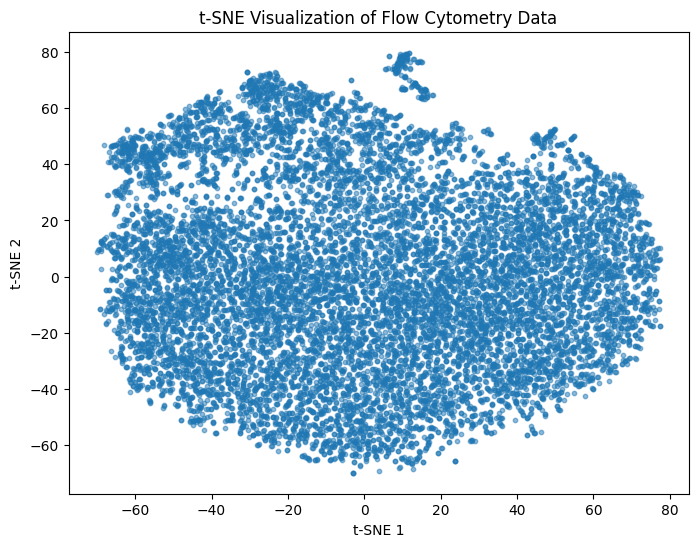

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(meta2)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Visualization of Flow Cytometry Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [7]:
data3,meta3 = fcsparser.parse("FC-based-SCP/Bone marrow/SCP52724/H1_BEZ-235_Basal1_PhenoGraph.fcs")
meta3

,Time,Cell_length,DNA1,DNA2,BC1,BC2,BC3,BC4,BC5,BC6,...,pErk1-2,CD3,pP38,CD117,cCaspase3,HLA-DR,CD64,CD41,Viability,PhenoGraph
0,350.0,38.0,425.053955,908.477112,99.671402,76.716644,-0.001019,1.013826,3.437718,2.729790,...,-0.264322,194.200912,2.123220,5.973713,5.237486,5.315355,-0.112290,-0.087390,17.219826,4.0
1,527.0,21.0,182.141647,570.468384,22.855957,19.589943,0.711139,-0.013670,4.480175,-0.627733,...,1.263899,342.496521,-0.278009,0.911465,-0.216014,-0.449197,-0.183364,-0.176661,11.873612,5.0
2,645.0,31.0,149.929840,366.722870,56.068939,23.734064,-0.376018,-0.262944,4.925073,0.576121,...,5.487423,0.312681,6.712695,-0.441480,18.710365,744.242004,38.896111,7.037106,5.586719,6.0
3,1461.0,57.0,110.084946,243.369171,97.019119,118.112930,3.027318,0.066082,17.394432,3.886724,...,4.991581,0.131338,3.913077,-0.181128,-0.679610,-0.377687,1.329026,-0.395006,4.628178,24.0
4,2302.0,20.0,124.812454,237.534653,51.033321,25.318712,-0.042981,-0.685185,3.949038,1.319712,...,0.013872,138.679016,-0.616285,-0.400147,-0.588997,-0.311405,0.327034,-0.069359,1.053593,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15015,5374676.0,31.0,203.340561,312.495575,7.410574,9.022044,-0.212802,-0.832140,7.326694,0.873435,...,0.739454,0.569385,0.758374,-0.028258,-0.618266,-0.057520,1.367575,-0.263946,9.954564,24.0
15016,5375360.0,20.0,330.354736,594.985046,97.489388,71.463821,0.531214,1.230621,6.490983,-0.016889,...,-0.053638,8.807458,-0.530583,2.480141,-0.485750,-0.723743,-0.462611,-0.245115,-0.707300,7.0
15017,5375910.0,27.0,433.194519,651.545532,73.367088,77.979340,0.640068,-0.032278,11.974370,4.298773,...,0.810169,2.104469,-0.387961,-0.335687,-0.154689,215.583084,-0.337079,4.698669,0.988895,3.0
15018,5377668.0,20.0,228.507660,466.291809,153.851868,174.540970,-0.704109,-0.781134,4.759868,1.488969,...,-0.147133,3.470567,-0.459746,-0.507262,2.028074,4.617233,7.480330,-0.040083,76.120293,9.0


In [10]:
data3,meta3 = fcsparser.parse("FC-based-SCP/Bone marrow/SCP52724/H1_NoDrug_Basal2_PhenoGraph.fcs")
meta3.columns

Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'BC1', 'BC2', 'BC3', 'BC4',
       'BC5', 'BC6', 'pPLCg2', 'CD19', 'p4EBP1', 'CD11b', 'pAMPK', 'pSTAT3',
       'CD34', 'pSTAT5', 'pS6', 'pCREB', 'pc-Cbl', 'CD45', 'CD123', 'pSTAT1',
       'pZap70-Syk', 'CD33', 'CD47', 'pAKT', 'CD7', 'CD15', 'pRb', 'CD44',
       'CD38', 'pErk1-2', 'CD3', 'pP38', 'CD117', 'cCaspase3', 'HLA-DR',
       'CD64', 'CD41', 'Viability', 'PhenoGraph'],
      dtype='object')